<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/Mid_ML_Keras_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика по определению моделей в Keras

В каждом из заданий ниже, реализуйте модель, повторяющую структуру модели на приложенной картинке. При определении моделей, можете использовать как Sequential так и Functional API.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np

# tf.enable_eager_execution()
tf.__version__

'2.5.0'

## Задание 1

Реализуйте модель описанную ниже.


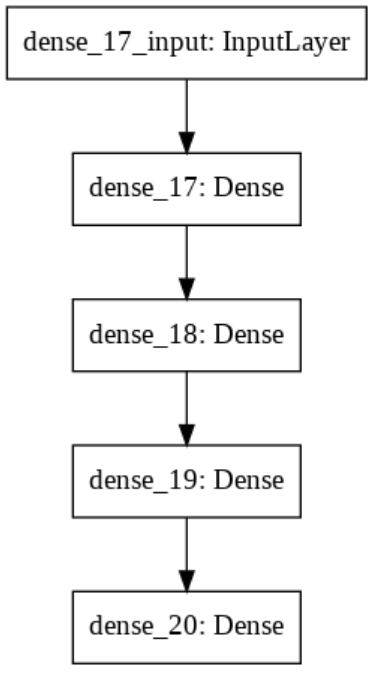

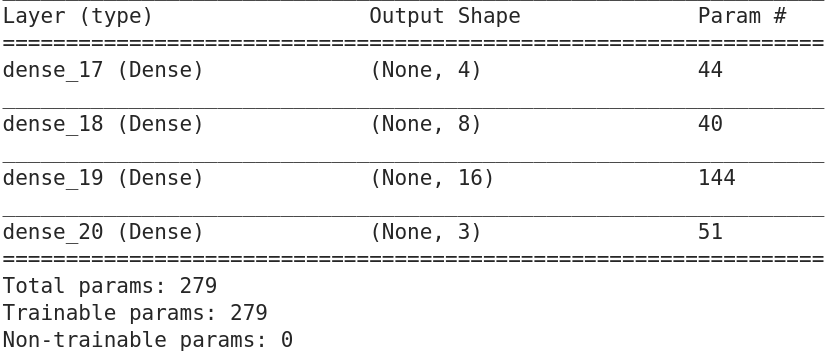

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_19 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 51        
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


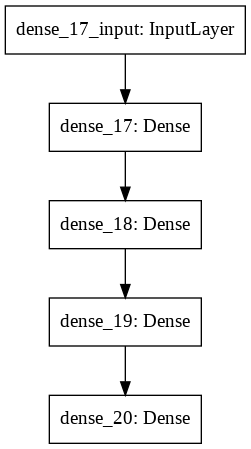

In [18]:
# <YOUR CODE STARTS HERE >

model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(10,), name="dense_17"))
model.add(Dense(8, name="dense_18"))
model.add(Dense(16, name="dense_19"))
model.add(Dense(3, name="dense_20", activation="softmax"))

# <YOUR CODE ENDS HERE >
model.summary()
tf.keras.utils.plot_model(model, show_shapes=False)

In [19]:
output = model(np.ones((3, 10)))
assert np.allclose(output.numpy().sum(1),  np.ones(3)), "Did you forget softmax in the last layer?"
assert model.count_params() == 279, "Wrong params number"
print("Simple tests passed")

Simple tests passed


## Задание 2

Реализуйте модель описанную ниже.

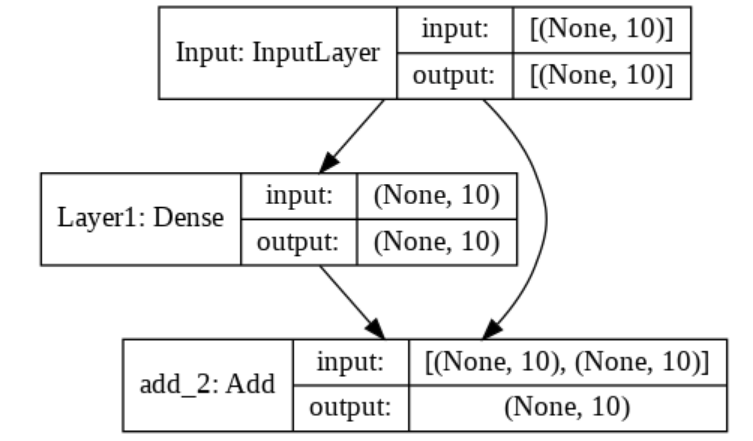

*Кстати, такая кострукция не лишена смысла -- в следующем модуле мы увидим как она помогла совершить прорыв в классификации изображений. Она носит название residual block*


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputLayer (InputLayer)         [(None, 10)]         0                                            
__________________________________________________________________________________________________
Layer1 (Dense)                  (None, 10)           110         InputLayer[0][0]                 
__________________________________________________________________________________________________
add_2 (Add)                     (None, 10)           0           Layer1[0][0]                     
                                                                 InputLayer[0][0]                 
Total params: 110
Trainable params: 110
Non-trainable params: 0
__________________________________________________________________________________________________
Simple tests passed


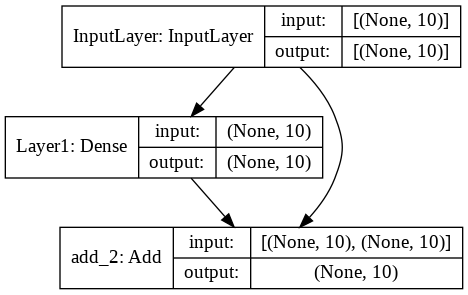

In [23]:
# <YOUR CODE STARTS HERE >

input_layer = tf.keras.layers.Input(shape=(10,), name="InputLayer")
layer_1_out = Dense(10, name="Layer1")(input_layer)
sum_out = tf.keras.layers.Add(name="add_2")([layer_1_out, input_layer])

model = tf.keras.Model(inputs=input_layer, outputs=sum_out)


# <YOUR CODE ENDS HERE >
model.summary()
assert model.count_params() == 110, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=True)

## Задание 3

Реализуйте модель описанную ниже.


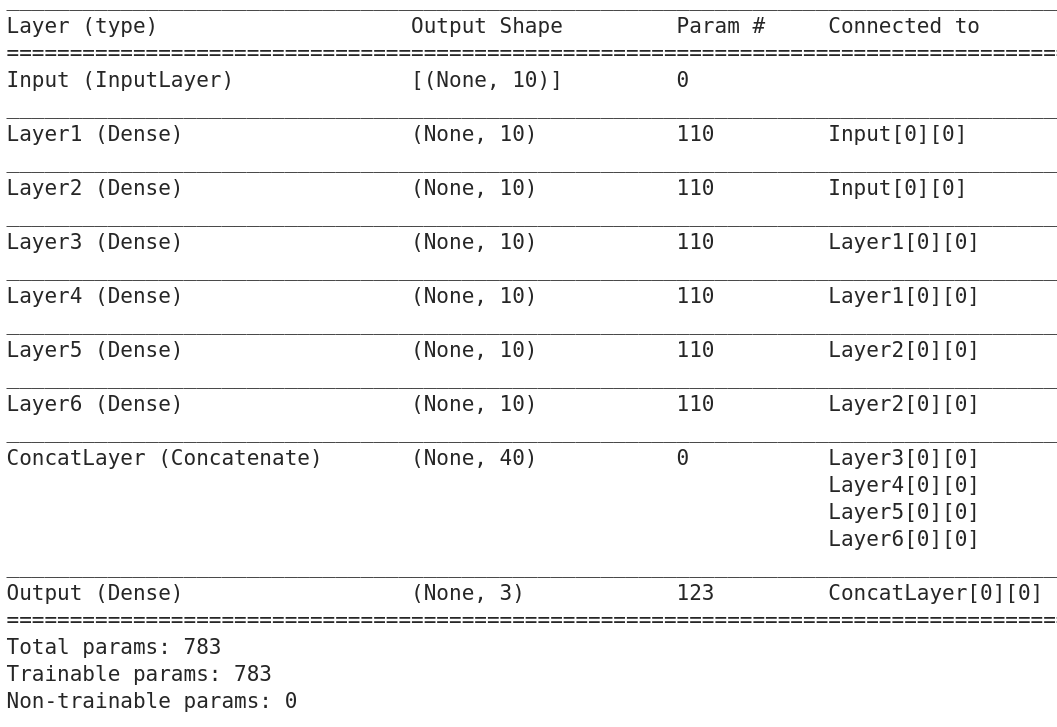

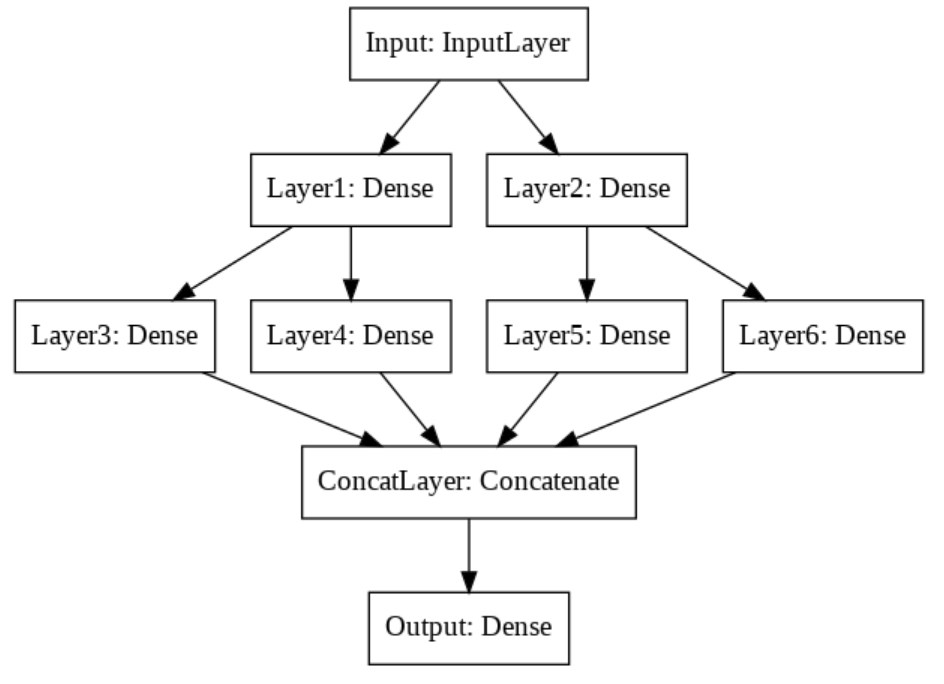

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputLayer (InputLayer)         [(None, 10)]         0                                            
__________________________________________________________________________________________________
Layer1 (Dense)                  (None, 10)           110         InputLayer[0][0]                 
__________________________________________________________________________________________________
Layer2 (Dense)                  (None, 10)           110         InputLayer[0][0]                 
__________________________________________________________________________________________________
Layer3 (Dense)                  (None, 10)           110         Layer1[0][0]                     
____________________________________________________________________________________________

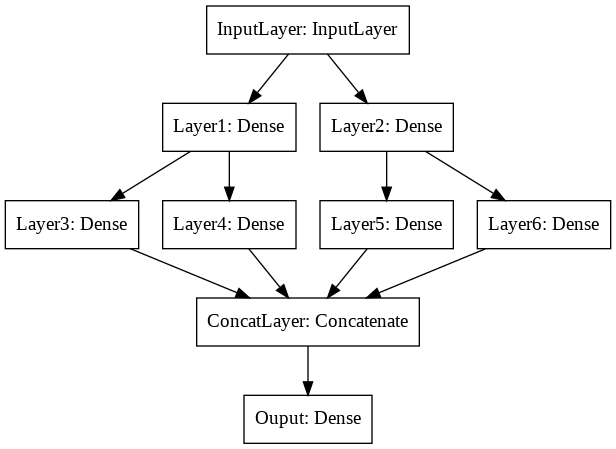

In [28]:
# <YOUR CODE STARTS HERE >



input_layer = tf.keras.layers.Input(shape=(10,), name="InputLayer")

l1_out = Dense(10, name="Layer1")(input_layer)
l2_out = Dense(10, name="Layer2")(input_layer)

l3_out = Dense(10, name="Layer3")(l1_out)
l4_out = Dense(10, name="Layer4")(l1_out)
l5_out = Dense(10, name="Layer5")(l2_out)
l6_out = Dense(10, name="Layer6")(l2_out)

concat_layer = tf.keras.layers.Concatenate(name="ConcatLayer")([l3_out, l4_out, l5_out, l6_out])

output = Dense(3, name="Ouput")(concat_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output)




# <YOUR CODE ENDS HERE >

model.summary()
assert model.count_params() == 783, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=False)